In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

In [40]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#이후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [41]:
import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [42]:
cd /content/drive/MyDrive/UBION_final_project/data

/content/drive/MyDrive/UBION_final_project/data


In [43]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv("basic_final_df.csv",index_col = 0)
df.head()

,회사명,거래소코드,차기부도여부,회계년도,산업코드,소속코드,상장일,감사의견코드,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,종업원수증가율,비유동자산증가율,종업원1인당 매출액증가율,종업원1인당 인건비증가율,매출액총이익률,매출액영업이익률,매출액순이익률,총자본사업이익률,총자본영업이익률,총자본순이익률,자기자본영업이익률,자기자본순이익률,자본금영업이익률,자본금순이익률,조세 대 조세차감전순이익률,기업순이익률,경영자본영업이익률,경영자본순이익률,매출원가 대 매출액비율,영업비율,영업외손익률,금융비용부담률,외환이익 대 매출액비율,...,종업원1인당 매출액(백만원),종업원1인당 순이익(백만원),종업원1인당 인건비(백만원),노동장비율,기계장비율,자본집약도,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,부가가치(백만원).1,법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),조세공과(백만원),감가상각비(백만원),종업원1인당 부가가치(백만원).1,총자본투자효율.1,기계투자효율.1,부가가치율.1,종업원수,PER(Price earnings ratio)(최고),PER(Price earnings ratio)(최저),PBR(Price book-value ratio)(최고),PBR(Price book-value ratio)(최저),PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV)(백만원),EBITDA(백만원),EBITDA/매출액(%),EBITDA/금융비용(배),EBITDA/평균발행주식수(백만원),EV/EBITDA(배),산업대분류
0,(주)CMG제약,58820,0,2007.0,32102,5.0,2001/08/31,UQ,120.08,215.25,29.79,0.0,0.0,0.00,193.28,-45.98,0.0,1300.00,318.87,-96.14,-89.37,17.48,-74.30,-49.56,-5.80,-8.31,-5.55,-9.61,-6.41,-30.35,-20.25,0.0,-8.06,-13.44,-8.97,82.52,174.30,24.73,-22.46,0.43,...,16.04,-7.95,7.49,1.08,-1.45,197.09,-1.69,-306.79,0.00,-20.72,0.00,0.00,0.00,-372.08,-890.10,839.34,-403.36,30.44,5.72,45.88,-3.32,-1.69,0.00,-20.72,112.0,0.0,0.0,13.08,1.83,0.0,0.0,149.75,20.92,69545.33,-1288.45,-71.74,0.00,-104.44,0.000,3
1,(주)CMG제약,58820,0,2008.0,32102,5.0,2001/08/31,UQ,56.55,55.67,86.84,0.0,0.0,445.64,19.57,501.81,0.0,19.64,35.89,403.00,177.46,36.60,-35.02,-43.11,-12.32,-13.37,-16.46,-16.66,-20.50,-53.53,-65.89,0.0,-14.86,-21.06,-25.92,63.40,135.02,-8.09,4.18,-0.21,...,80.66,-34.77,20.79,16.36,1.49,257.89,-2.66,-41.89,-461.43,-8.50,0.00,0.00,0.00,-918.47,-4659.44,2786.26,452.08,85.22,51.69,365.72,-6.85,-2.66,-461.43,-8.50,134.0,0.0,0.0,4.07,0.67,0.0,0.0,9.13,1.49,-454.50,-3419.79,-31.64,-4.56,-221.19,0.133,3
2,(주)CMG제약,58820,0,2009.0,32102,5.0,2001/08/31,UQ,-33.92,-8.50,-41.24,0.0,0.0,42.07,-61.98,-6.12,0.0,-11.19,-27.05,5.71,48.45,24.33,-85.24,-179.14,-29.69,-30.14,-63.34,-50.63,-106.40,-107.39,-225.67,0.0,-60.16,-38.13,-80.13,75.67,185.24,-93.89,9.00,0.02,...,85.27,-152.75,30.87,85.38,25.37,191.90,-50.50,-113.50,-381.92,-113.66,0.00,0.00,0.00,-11532.47,-18176.78,3673.20,913.42,141.94,366.86,1548.89,-96.91,-50.50,-381.92,-113.66,119.0,0.0,0.0,11.44,2.34,0.0,0.0,8.40,1.72,26517.58,-7100.69,-69.98,-6.80,-443.98,0.000,3
3,(주)CMG제약,58820,0,2010.0,32102,5.0,2001/08/31,UQ,5.66,-11.92,18.08,0.0,0.0,18.70,82.10,11.86,0.0,8.40,-3.72,3.19,-0.91,23.74,-65.66,-67.39,-31.70,-31.74,-32.57,-56.14,-57.61,-51.61,-52.97,0.0,-28.28,-32.60,-33.46,76.26,165.66,-1.73,8.87,-0.02,...,87.99,-59.29,30.59,69.22,17.03,187.04,-1.87,-5.06,-20.57,-3.98,0.00,0.00,0.00,-451.70,-7648.55,3945.55,1007.16,252.23,137.41,1854.52,-3.50,-1.87,-20.57,-3.98,129.0,0.0,0.0,2.54,0.82,0.0,0.0,3.22,1.04,31200.74,-5598.06,-49.32,-5.51,-243.34,0.000,3
4,(주)CMG제약,58820,0,2011.0,32102,5.0,2001/08/31,UQ,14.18,7.86,31.54,0.0,0.0,-4.87,6.72,56.40,0.0,4.65,-1.92,49.45,-24.54,41.83,3.93,-7.12,2.85,2.70,-4.89,3.94,-7.14,3.29,-5.96,0.0,-4.34,2.79,-5.05,58.17,96.07,-11.06,0.81,-0.02,...,131.49,-9.37,23.08,71.32,19.75,204.06,13.77,39.40,142.24,21.37,82.14,17.86,-33.34,3793.19,-1264.49,3115.91,143.09,329.79,128.74,1340.15,28.10,13.77,142.24,21.37,135.0,0.0,0.0,3.31,1.11,0.0,0.0,3.14,1.05,37758.74,2038.64,11.48,11.24,46.75,18.522,3


In [45]:
col_list = df.drop(['회사명', '거래소코드','차기부도여부', '회계년도', '산업코드', '소속코드', '상장일', '감사의견코드', '산업대분류'], axis=1).columns
col_list

Index(['총자본증가율', '유형자산증가율', '유동자산증가율', '영업이익증가율', '순이익증가율', '재고자산증가율',
       '자기자본증가율', '매출액증가율', '종업원1인당 부가가치증가율', '종업원수증가율',
       ...
       'PCR(Price cash-flow ratio)(최고)', 'PCR(Price cash-flow ratio)(최저)',
       'PSR(Price sales ratio)(최고)', 'PSR(Price sales ratio)(최저)',
       '기업가치(EV)(백만원)', 'EBITDA(백만원)', 'EBITDA/매출액(%)', 'EBITDA/금융비용(배)',
       'EBITDA/평균발행주식수(백만원)', 'EV/EBITDA(배)'],
      dtype='object', length=157)

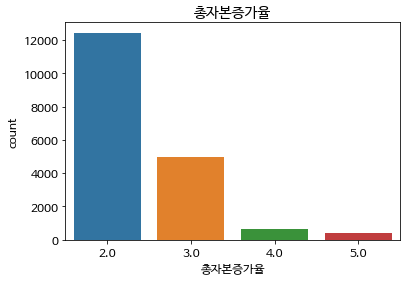

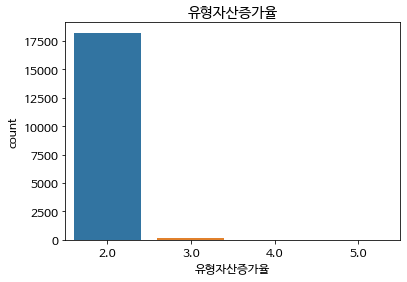

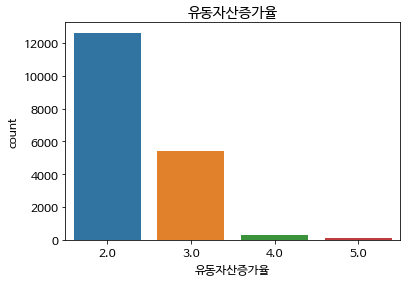

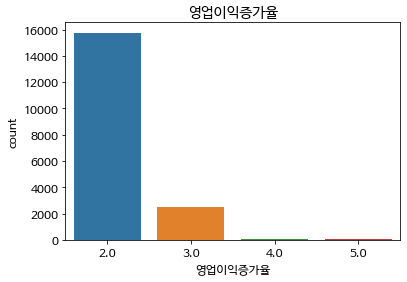

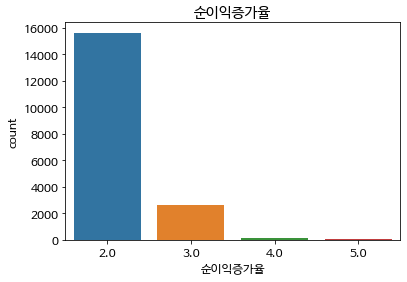

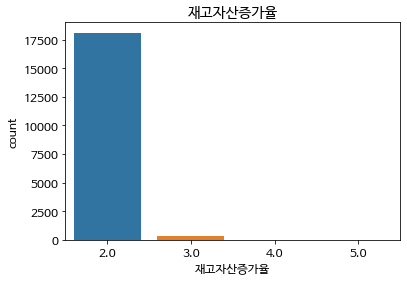

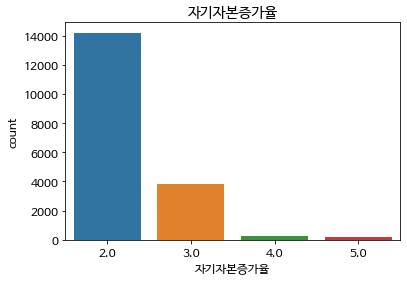

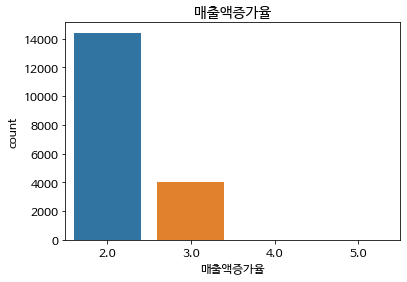

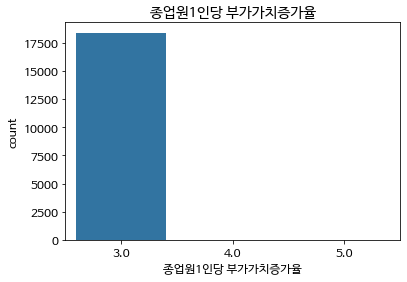

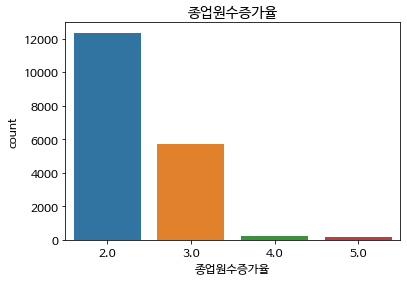

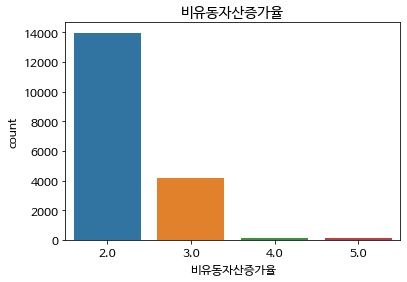

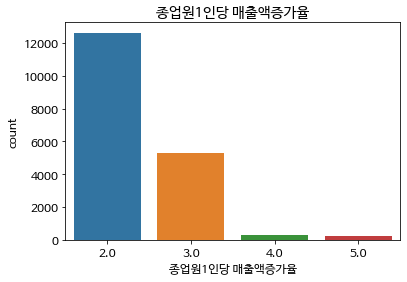

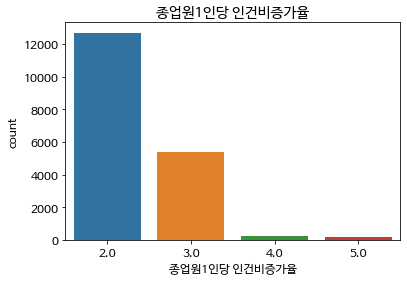

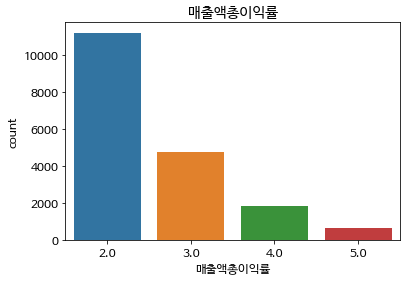

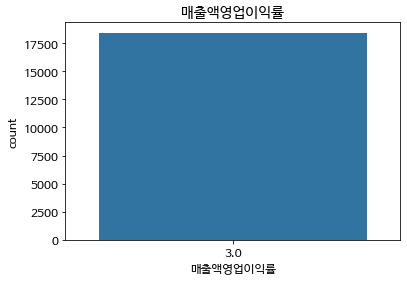

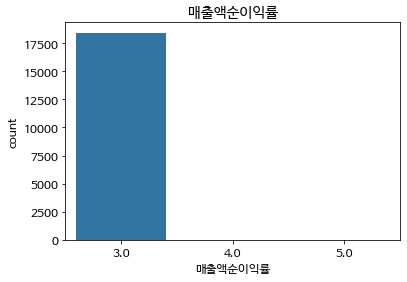

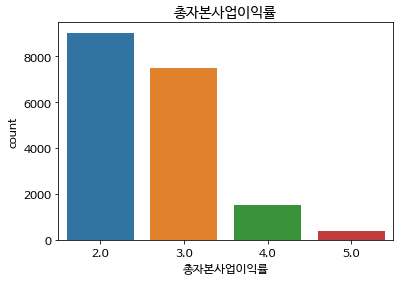

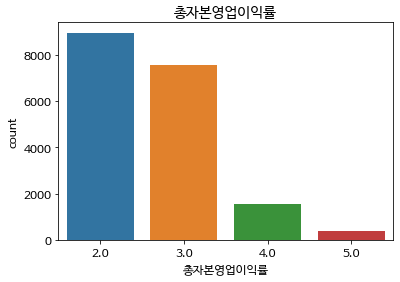

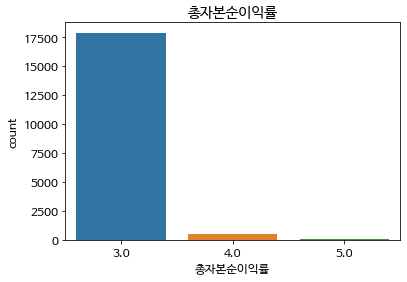

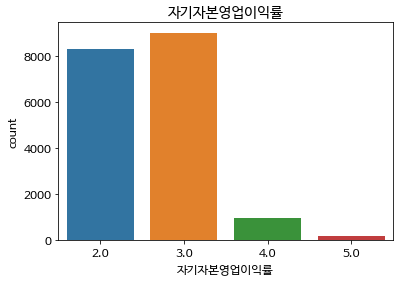

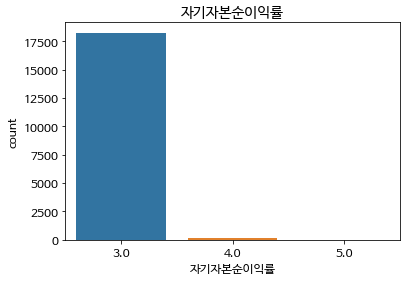

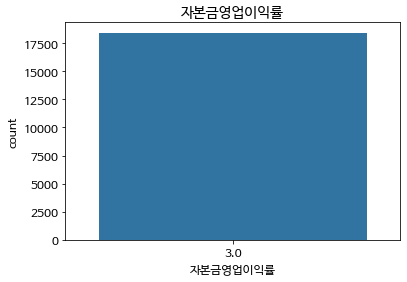

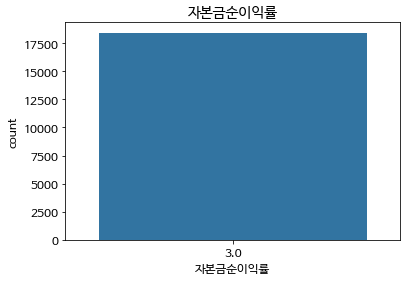

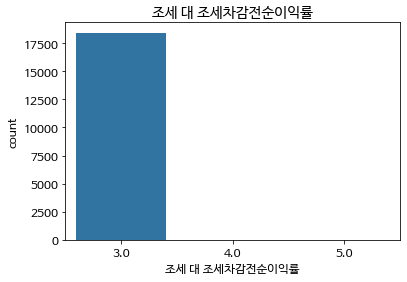

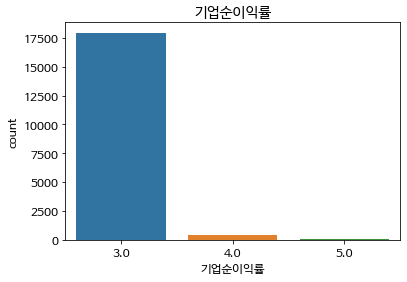

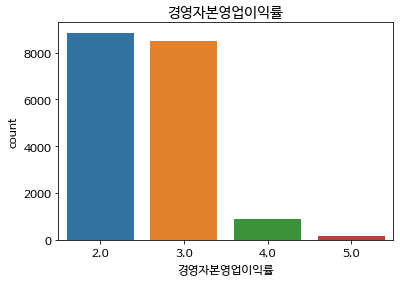

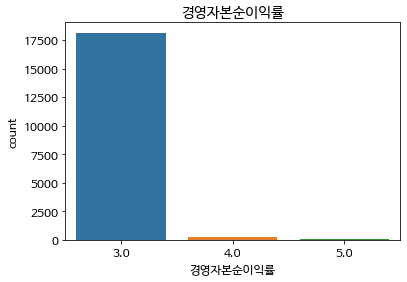

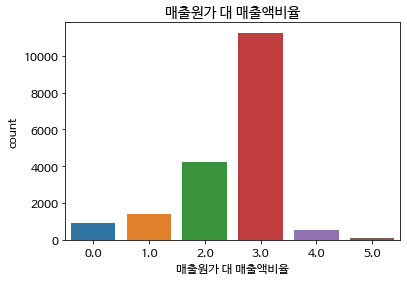

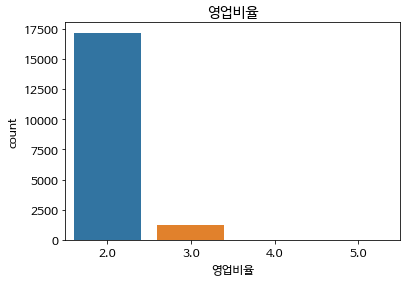

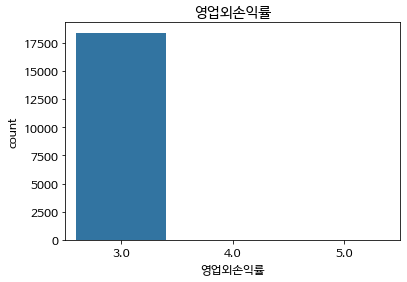

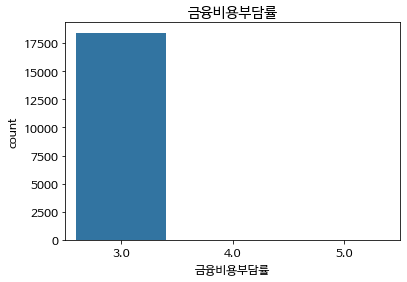

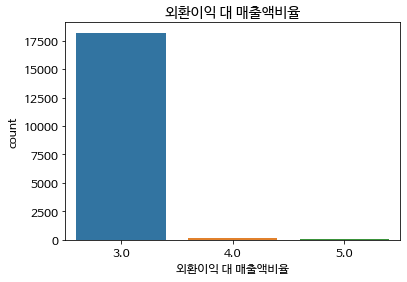

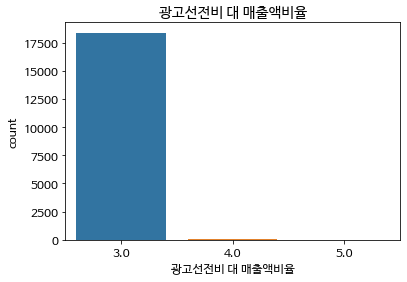

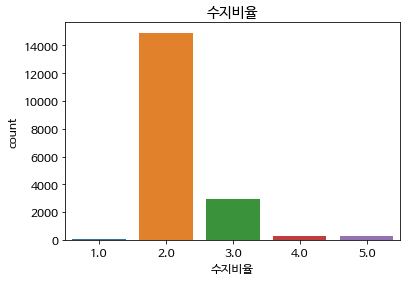

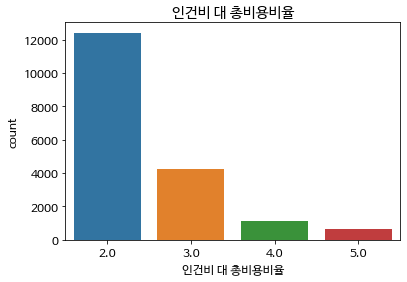

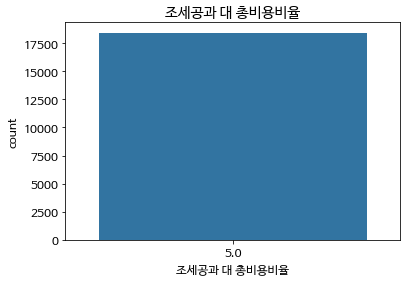

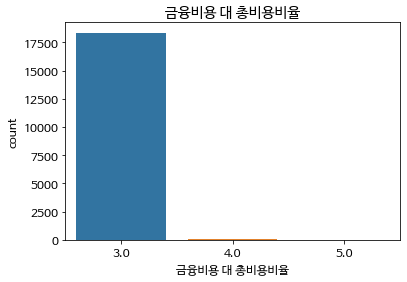

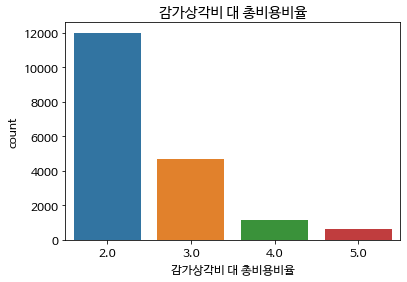

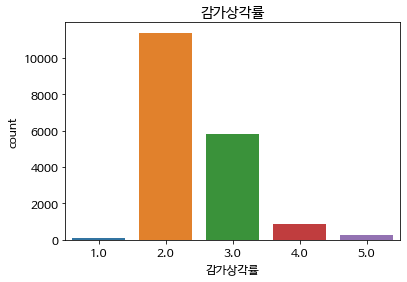

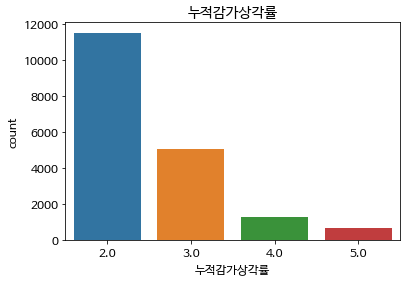

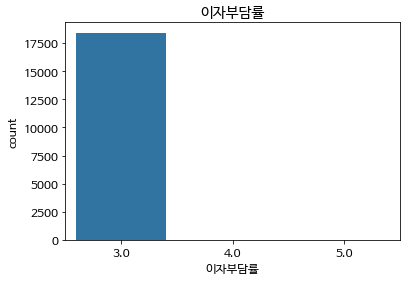

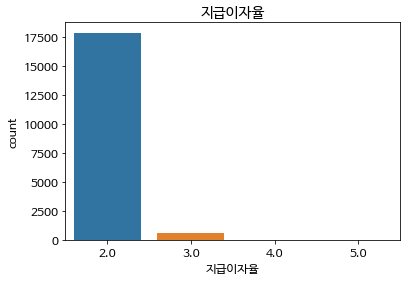

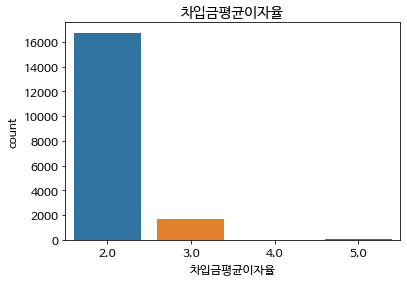

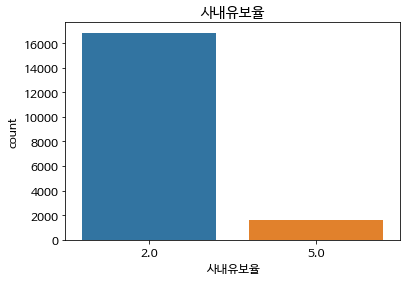

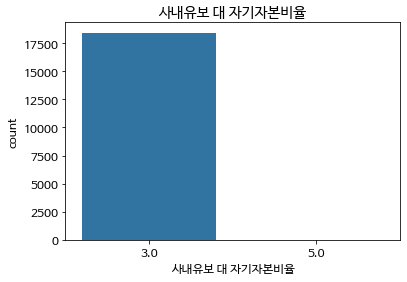

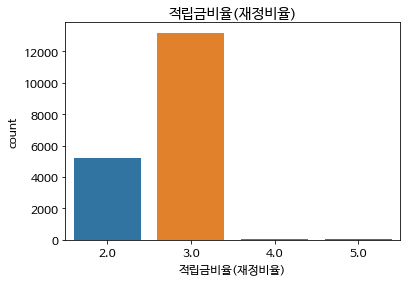

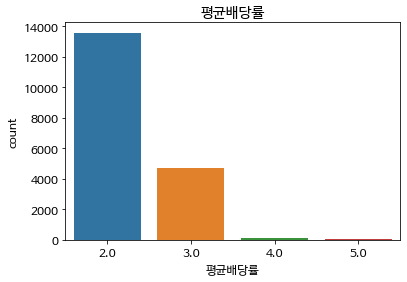

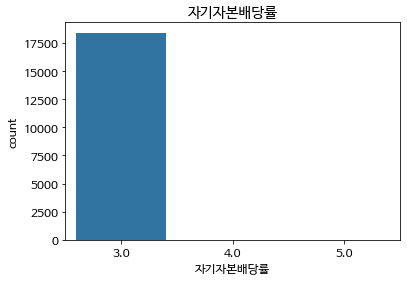

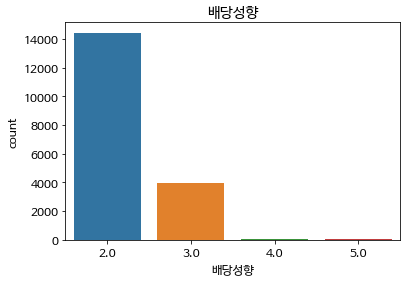

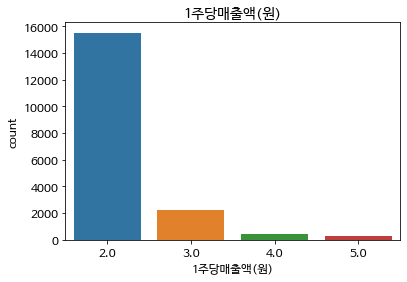

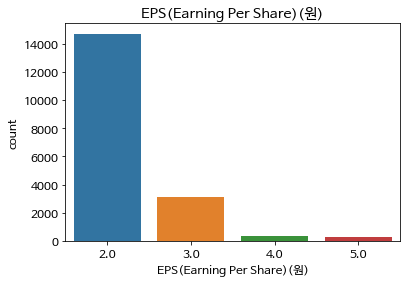

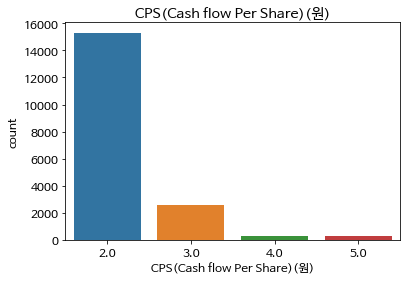

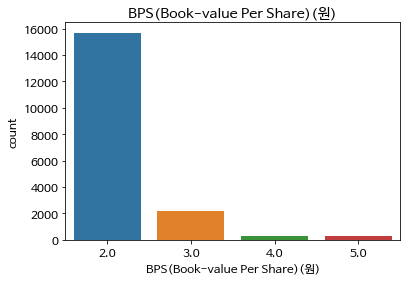

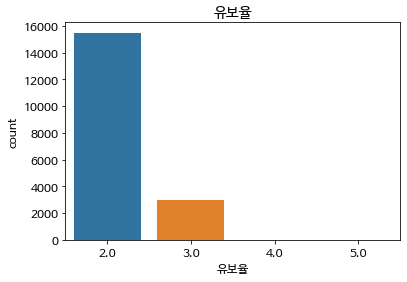

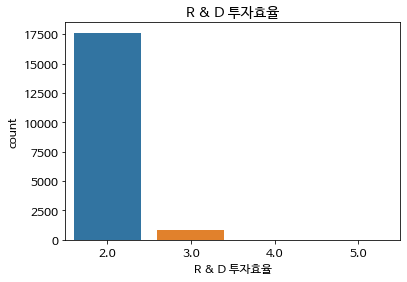

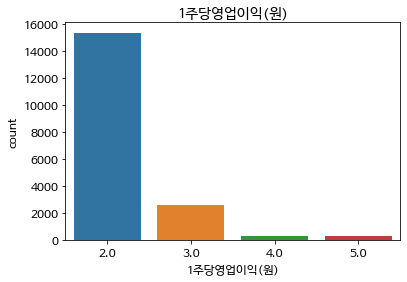

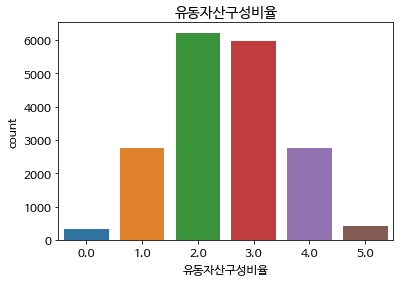

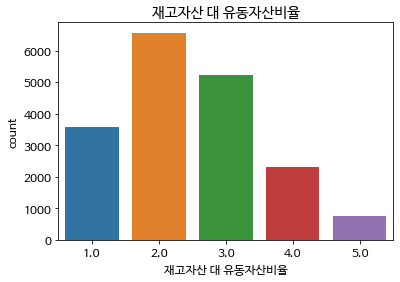

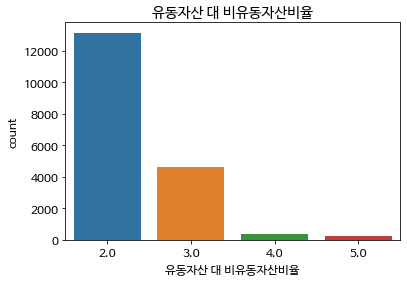

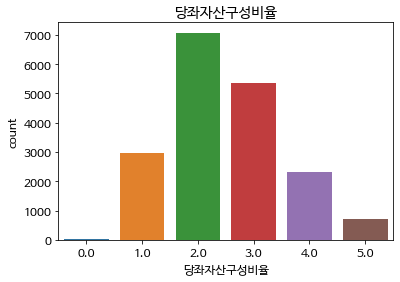

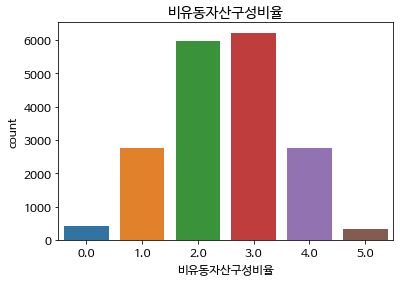

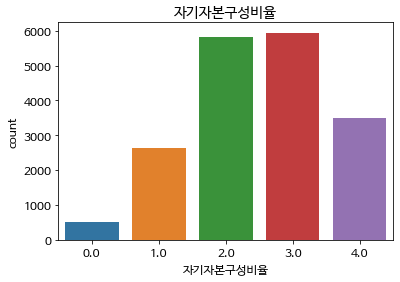

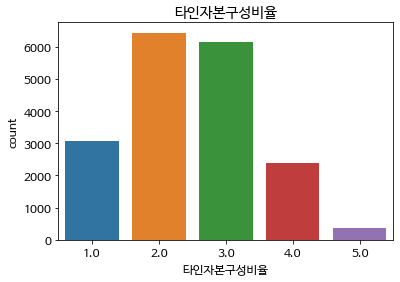

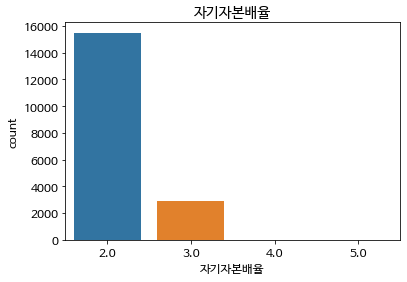

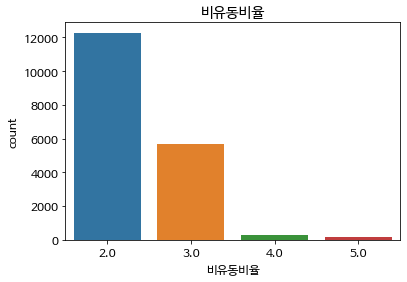

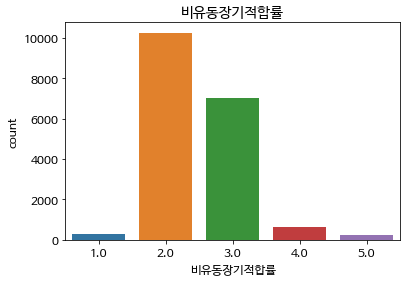

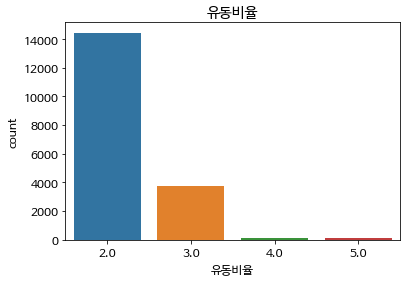

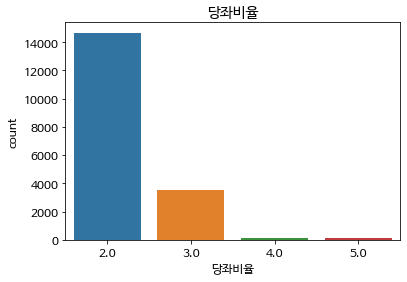

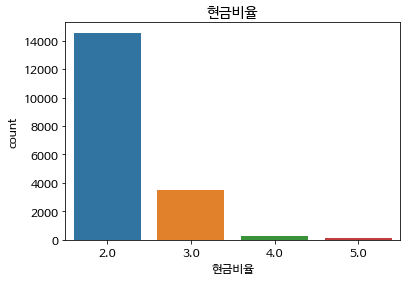

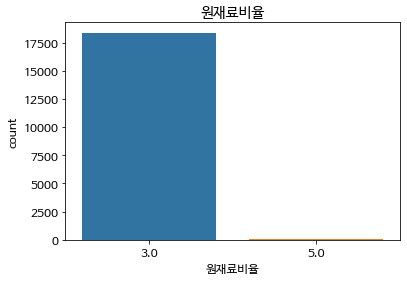

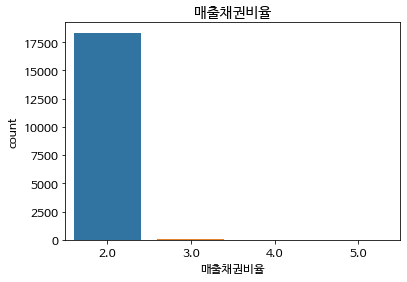

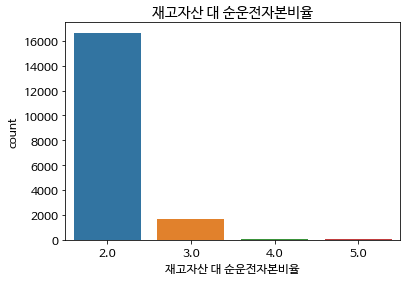

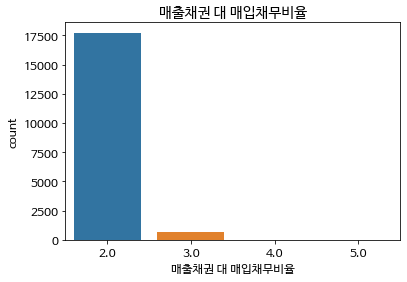

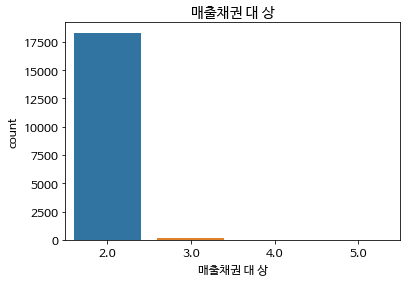

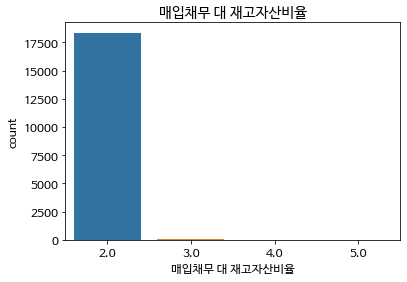

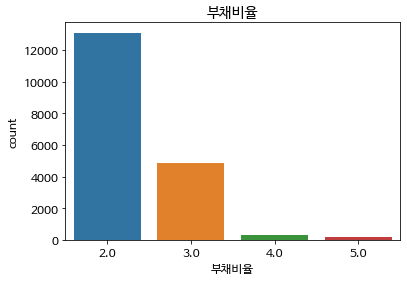

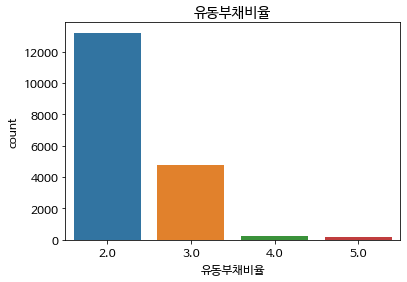

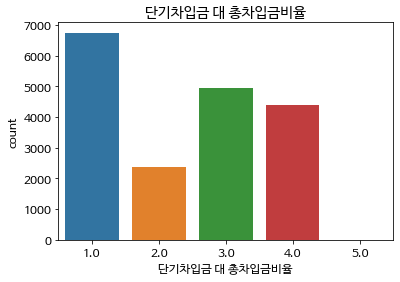

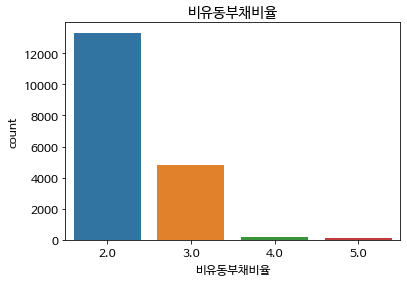

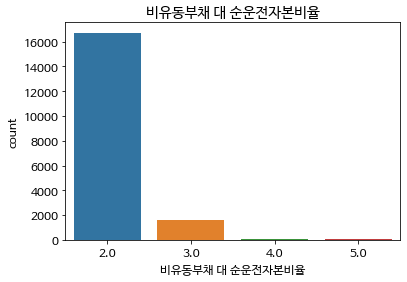

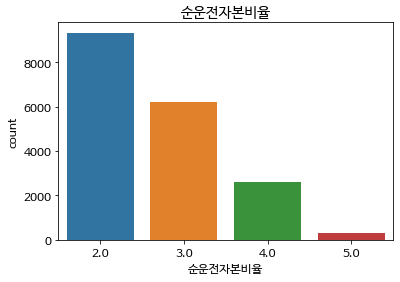

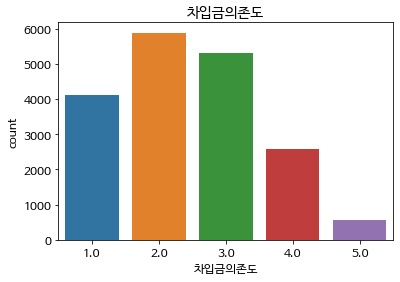

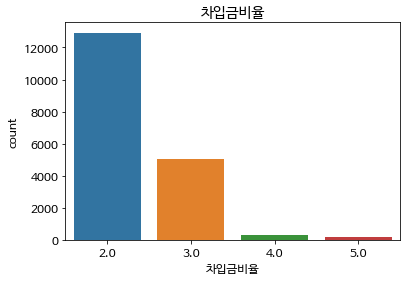

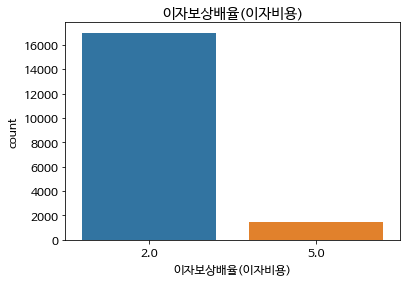

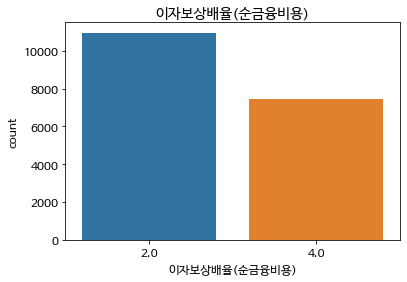

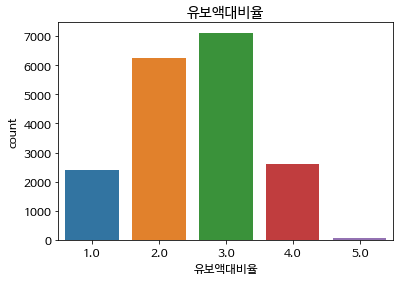

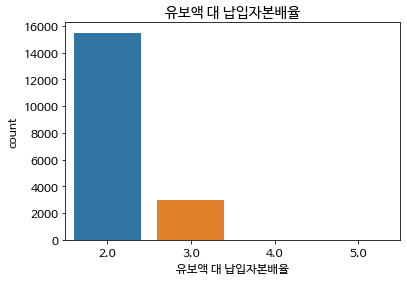

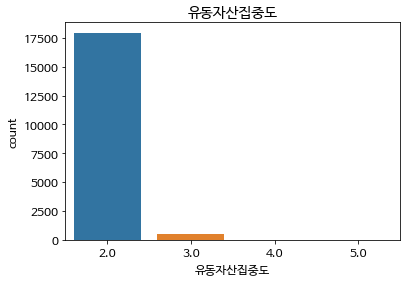

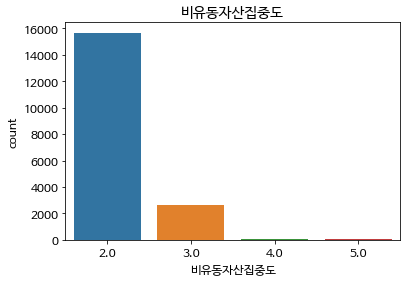

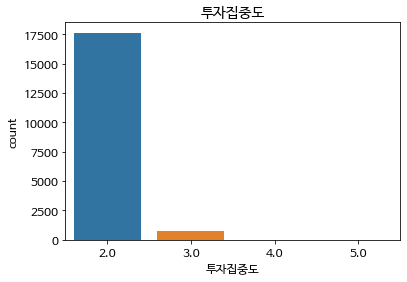

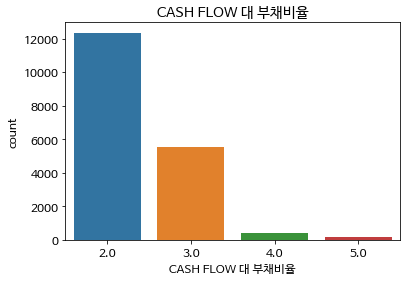

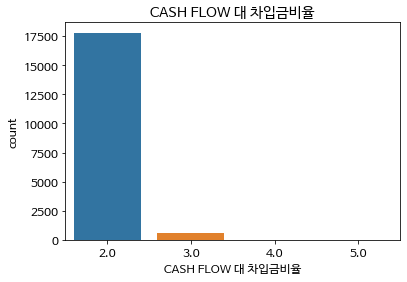

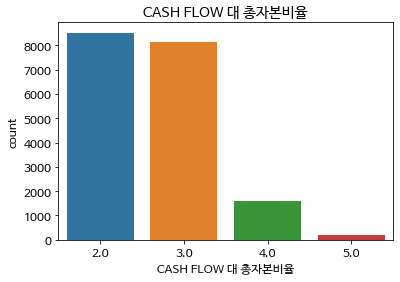

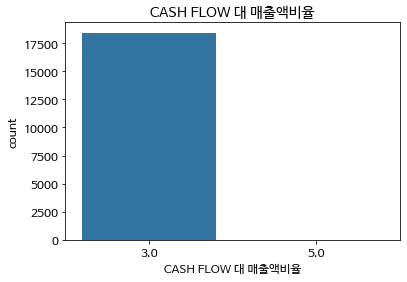

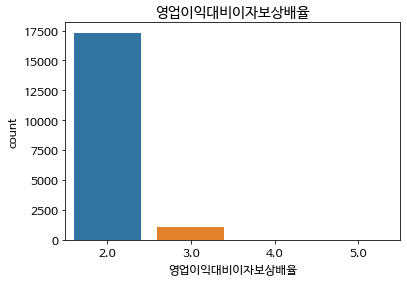

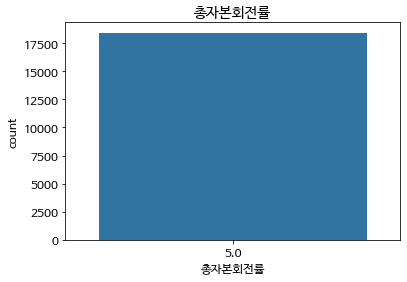

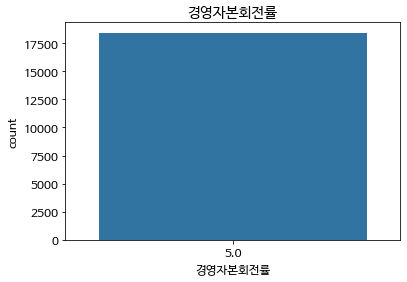

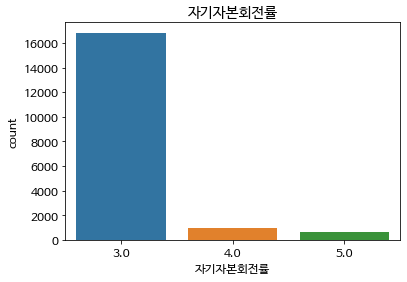

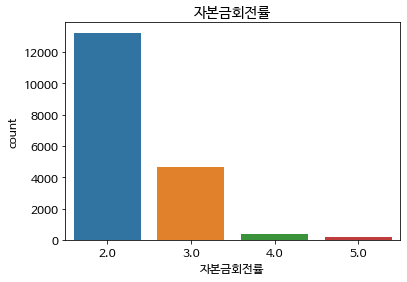

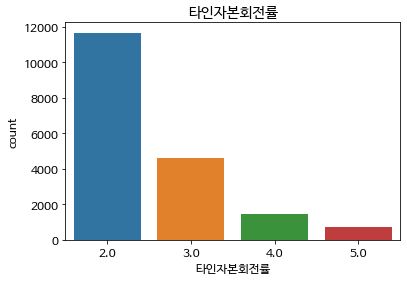

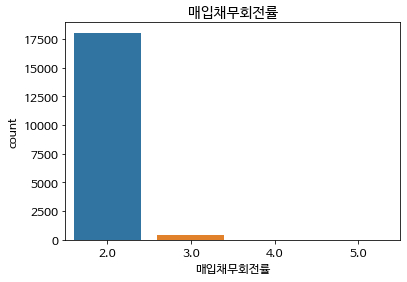

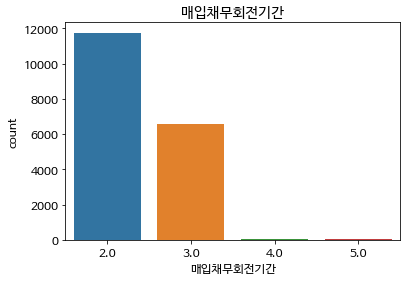

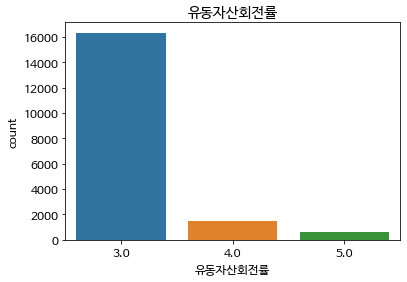

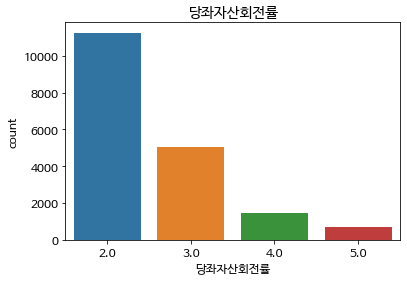

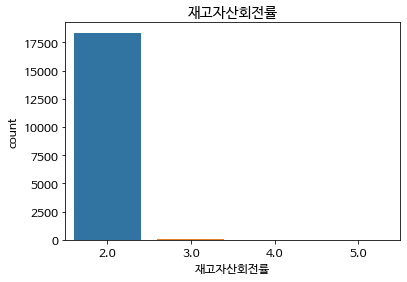

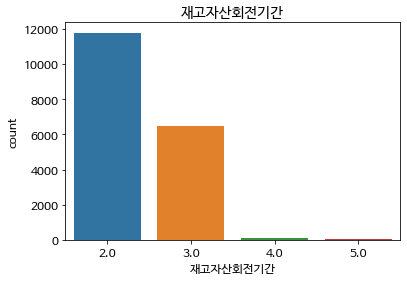

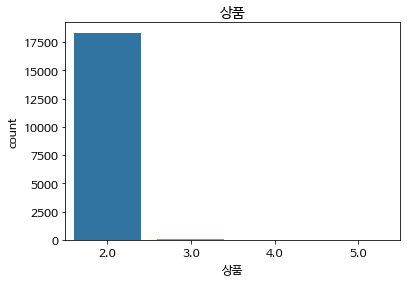

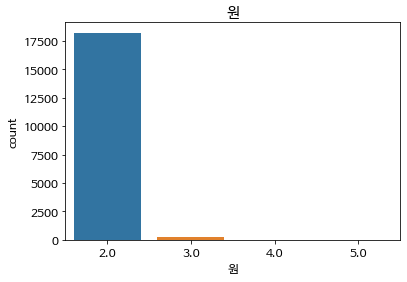

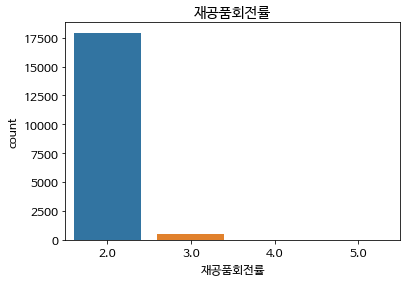

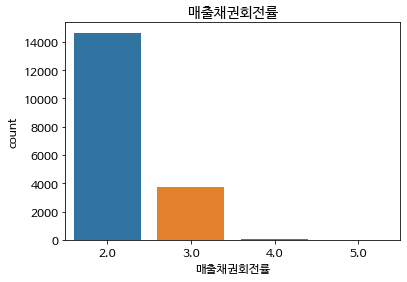

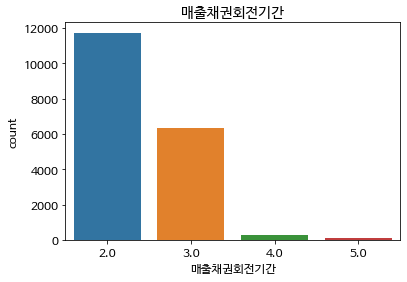

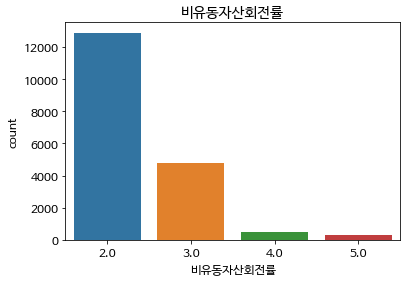

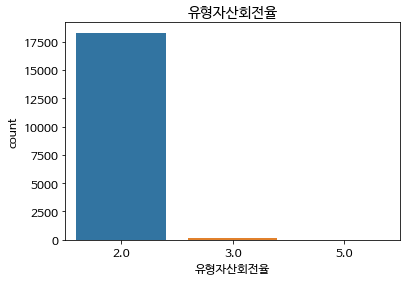

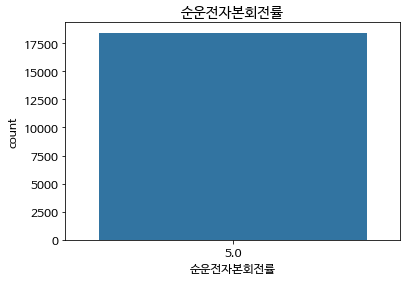

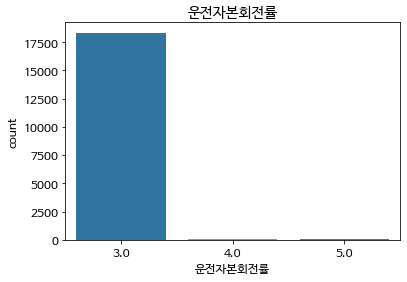

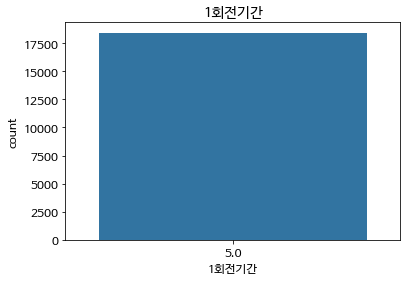

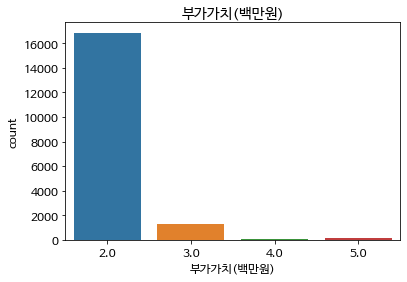

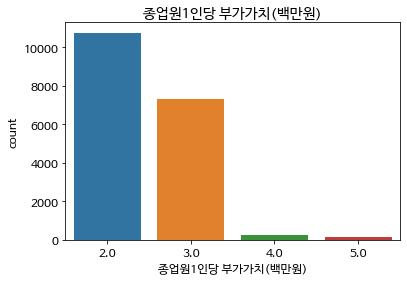

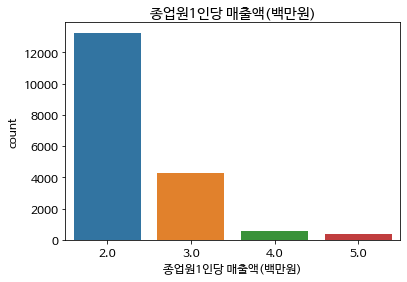

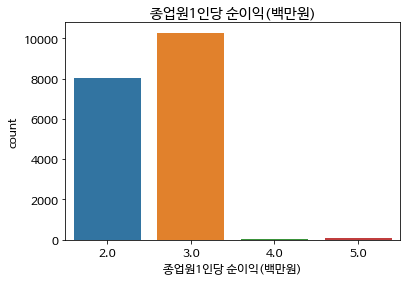

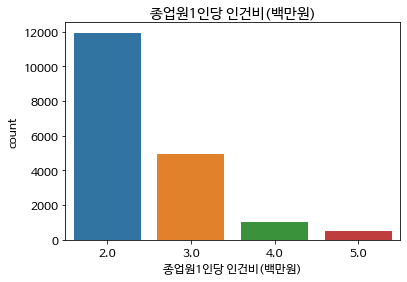

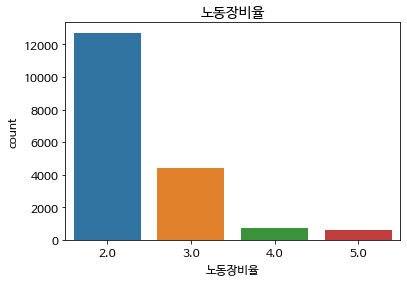

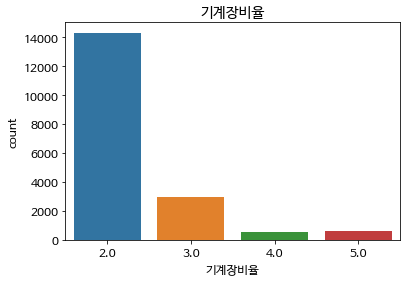

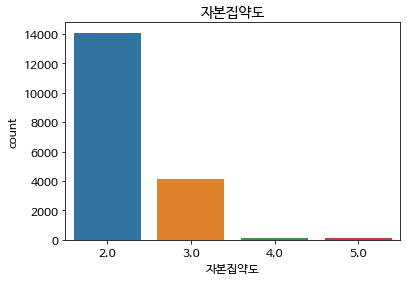

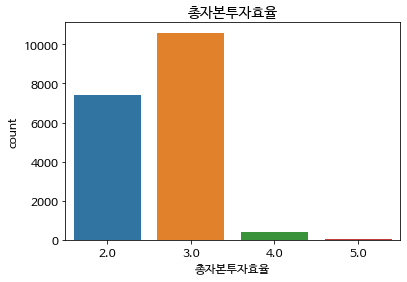

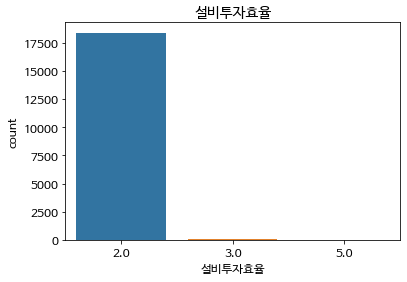

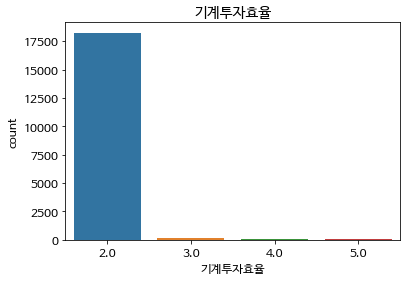

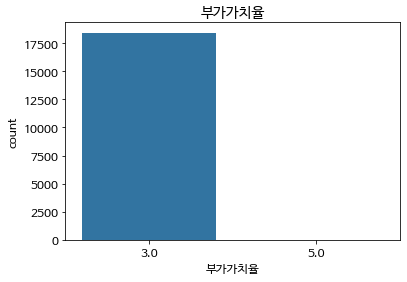

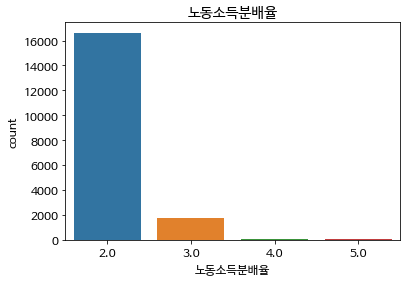

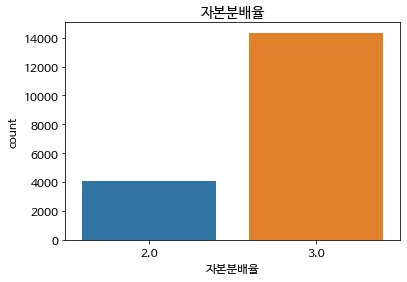

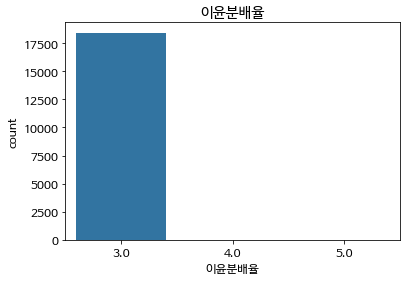

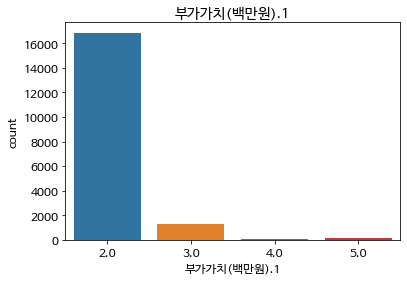

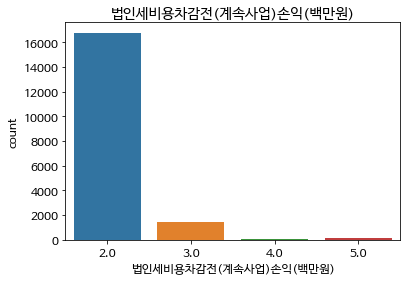

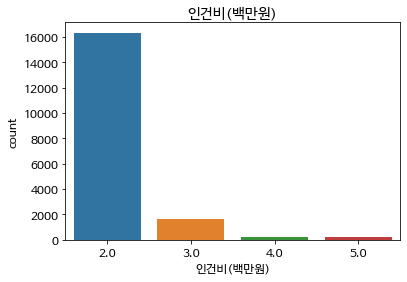

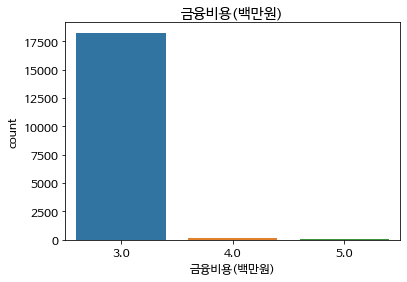

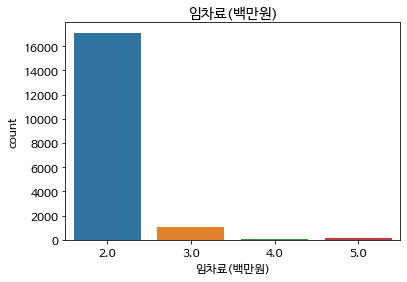

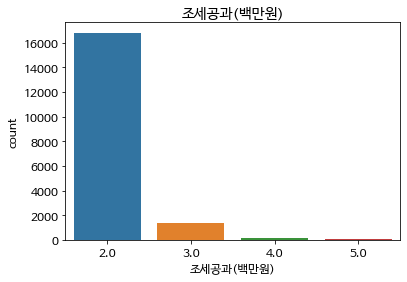

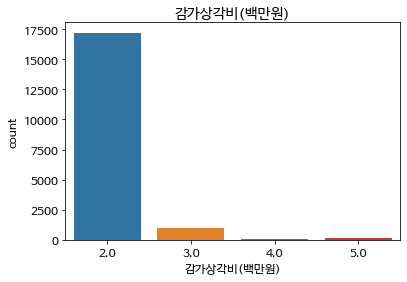

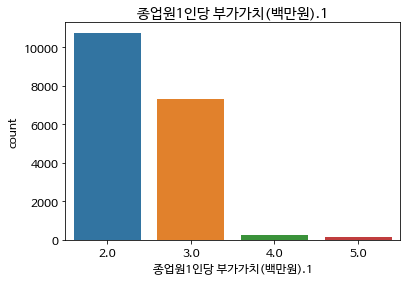

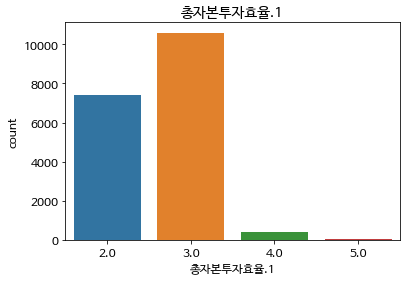

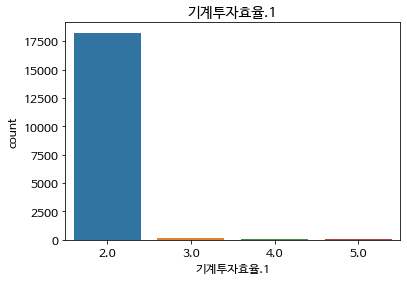

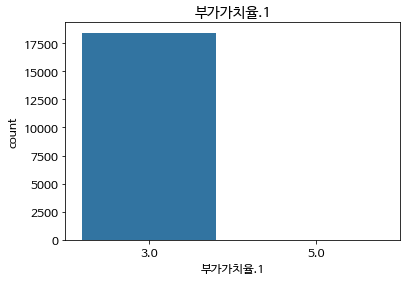

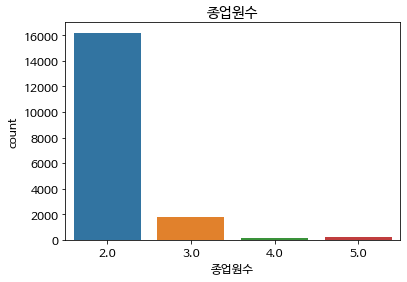

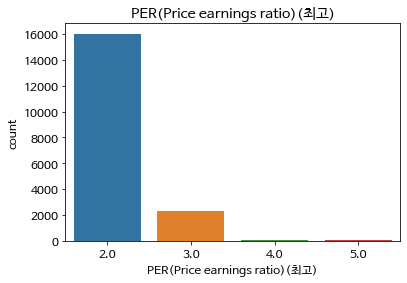

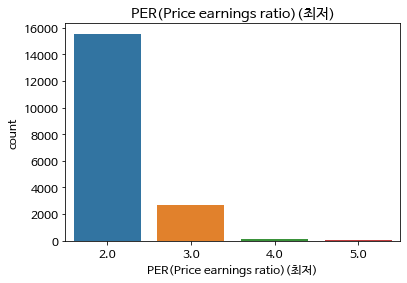

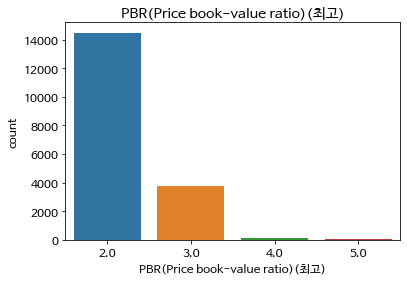

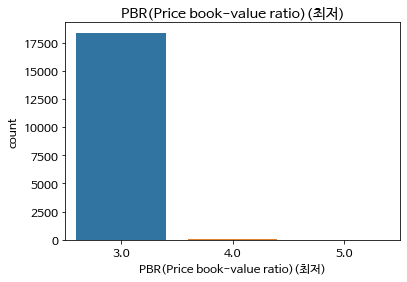

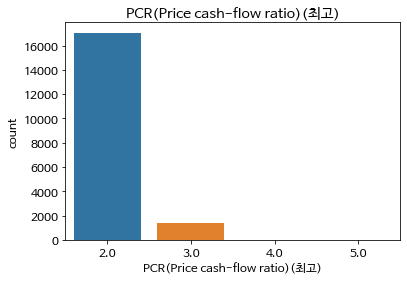

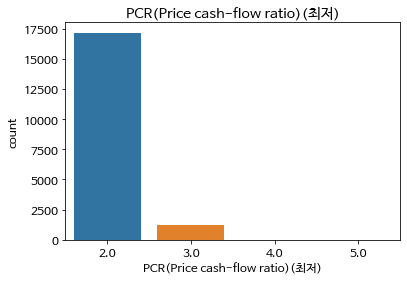

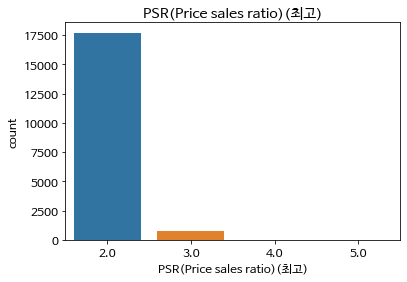

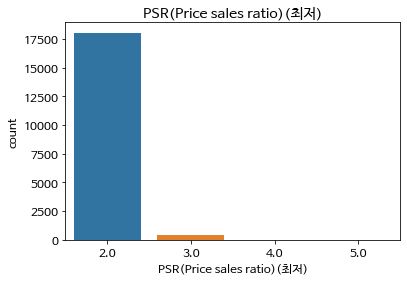

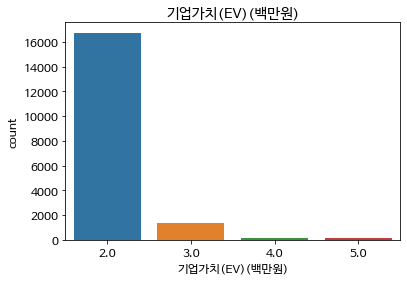

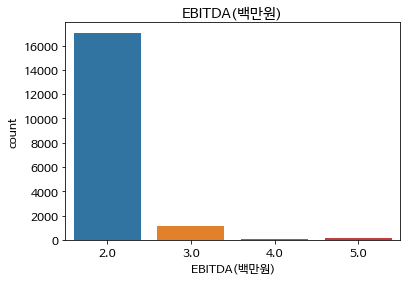

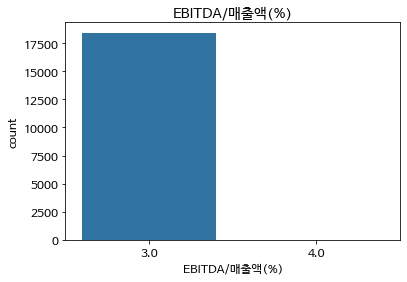

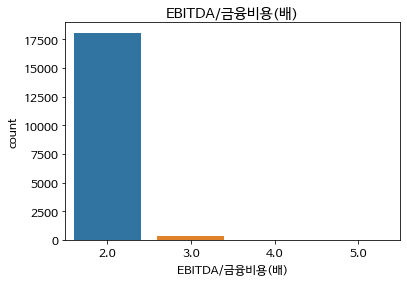

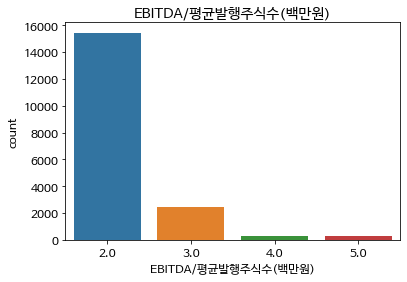

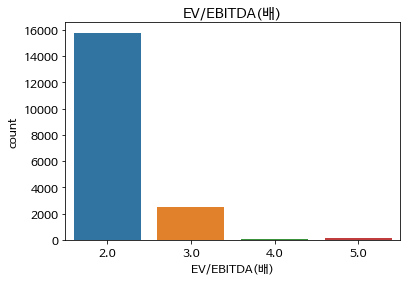

In [46]:
for col in col_list:
  col_mean = np.mean(df[col]) 
  col_sigma =  np.std(df[col])

  df.loc[df[col]< col_mean -2*(col_sigma), col] = 0
  df.loc[(col_mean -2*(col_sigma)<= df[col]) & (df[col]< col_mean -1*(col_sigma)), col] = 1
  df.loc[(col_mean -1*(col_sigma)<= df[col]) & (df[col]< col_mean ), col] = 2
  df.loc[(col_mean <= df[col]) & (df[col] < col_mean +1*(col_sigma)), col] = 3
  df.loc[(col_mean +1*(col_sigma)<= df[col]) & (df[col]< col_mean +2*(col_sigma)), col] = 4
  df.loc[col_mean +2*(col_sigma)<= df[col], col] = 5
  
  ORDERING = [0,1,2,3,4,5]
  plt.figure()
  plt.title(col)
  sns.countplot(x=col, data=df)
  plt.show()


In [47]:
df.to_csv("binning_df.csv",index=False)

In [49]:
test = df[df['회계년도'] >= 2018]
train = df[df['회계년도'] < 2018]

In [52]:
drop_col = ['회사명', '거래소코드', '산업코드', '소속코드','회계년도', '상장일', '감사의견코드','산업대분류']

In [53]:
test.drop(columns = drop_col, inplace=True)
train.drop(columns= drop_col, inplace=True )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
test.to_csv('binning_test.csv', index=False)
train.to_csv('binning_train.csv', index=False)